# Import dependecies


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Loading the dfset

In [64]:
df=pd.read_csv('F:/pdfs/kaggle_datasets/bigmartsalesdata/Traindataset.csv')

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data preprocessing
# Missing values

In [67]:
#To  fill Item_weight missing values to use the mean 
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [68]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [70]:
#to fill the missing values where the mode from the outlettype
missing_values = df[df["Outlet_Size"].isnull()]
mode_by_outlet_type = df.groupby("Outlet_Type")["Outlet_Size"].agg(pd.Series.mode)
for index, row in missing_values.iterrows():
  outlet_type = row["Outlet_Type"]
  mode_value = mode_by_outlet_type[outlet_type]
  df.loc[index, "Outlet_Size"] = mode_value

In [71]:
df.drop('Item_Identifier', axis=1, inplace=True)

In [72]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [73]:
d=df['Outlet_Identifier'].value_counts()
d

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

# Data Analysis
# Correlation

In [74]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data visulazation for numerical features

In [75]:
sns.set()

C:\Users\varap\AppData\Local\Temp\ipykernel_3132\2027342884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


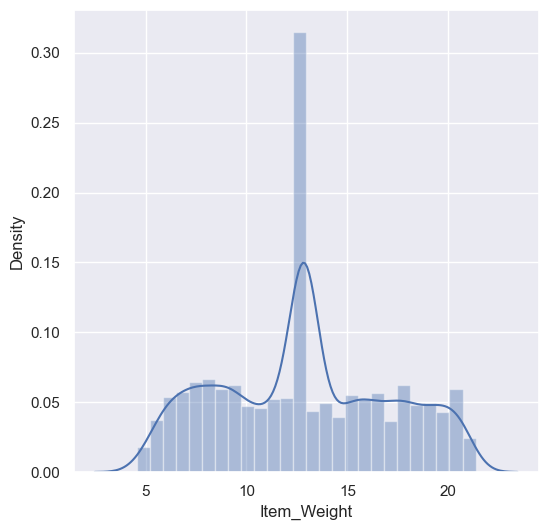

In [76]:
#itemweight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

C:\Users\varap\AppData\Local\Temp\ipykernel_3132\1444764017.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


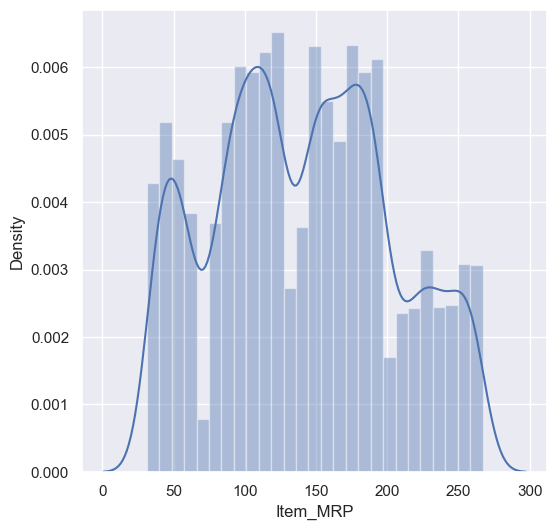

In [77]:
#prices distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

C:\Users\varap\AppData\Local\Temp\ipykernel_3132\2345102419.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


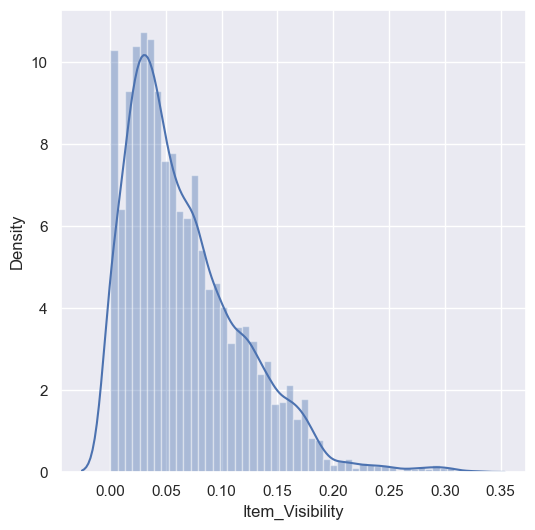

In [78]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

C:\Users\varap\AppData\Local\Temp\ipykernel_3132\3625690145.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


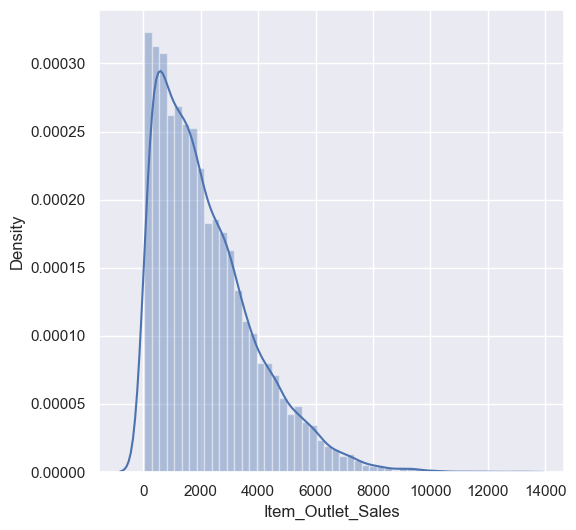

In [79]:
#Itemsales in a outlet distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

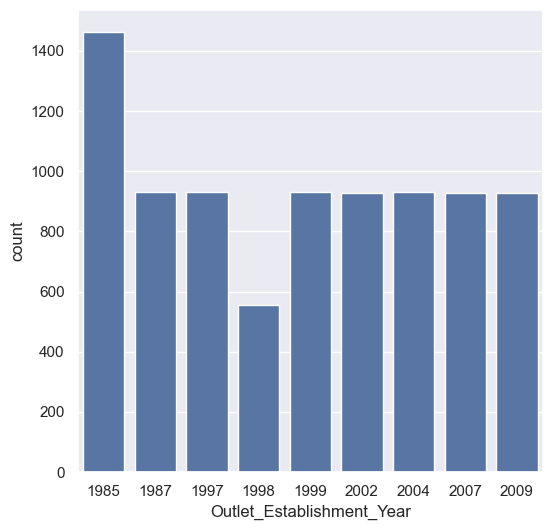

In [80]:
#no of outlet stores in a particular year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

# Data visualization for categorical features

In [81]:
df_cat=df.select_dtypes(include=['object']).columns
df_cat

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

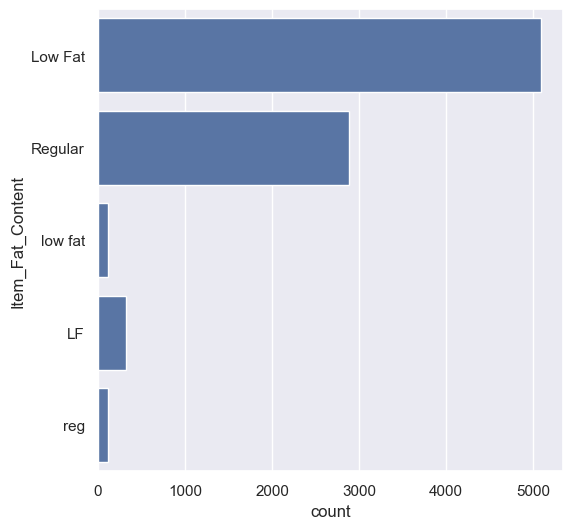

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(df['Item_Fat_Content'])
plt.show()

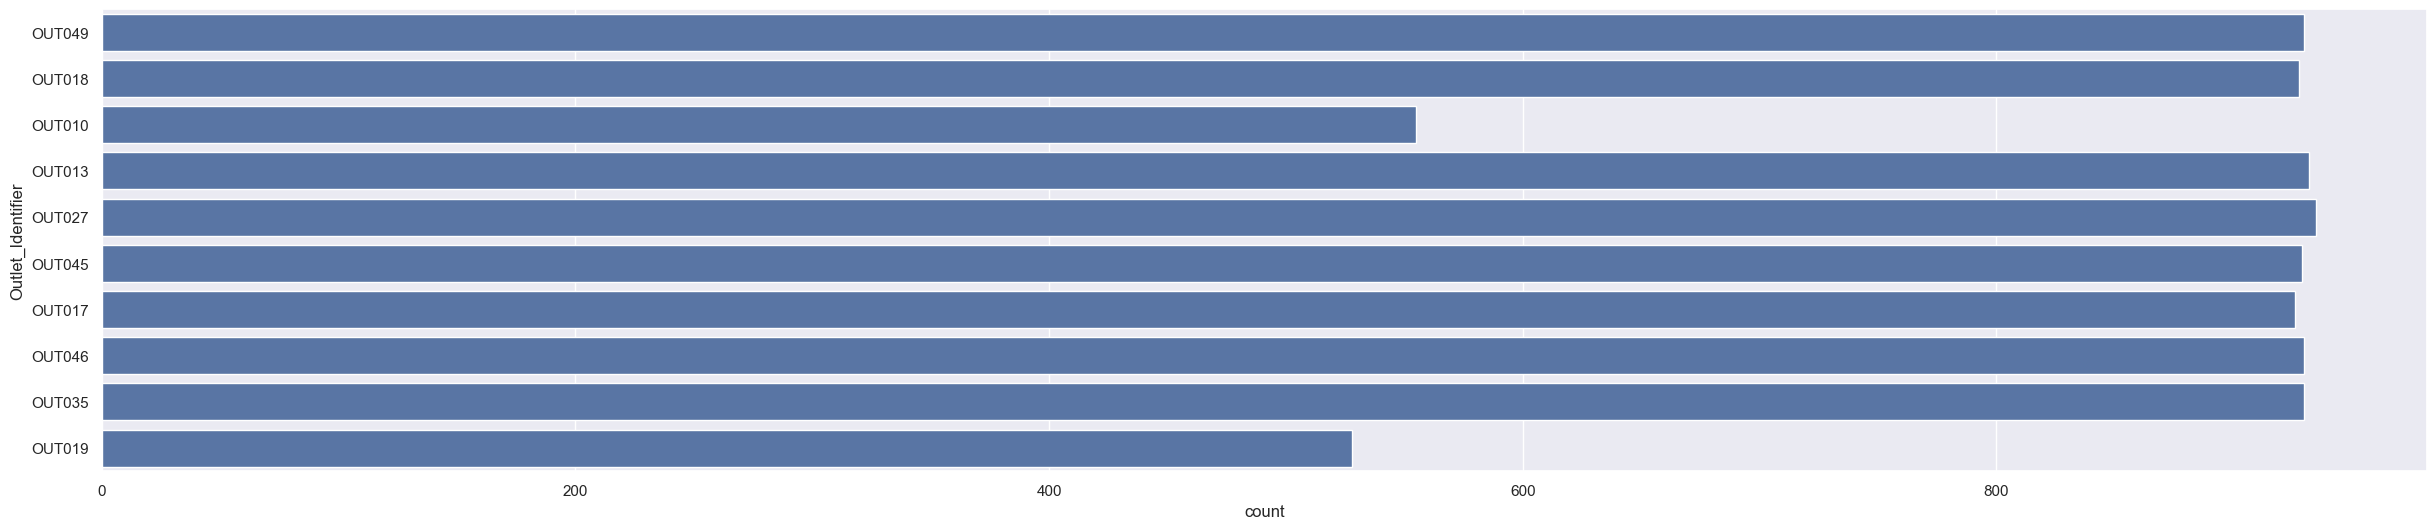

In [83]:
plt.figure(figsize=(30,6))
sns.countplot(df['Outlet_Identifier'])
plt.show()

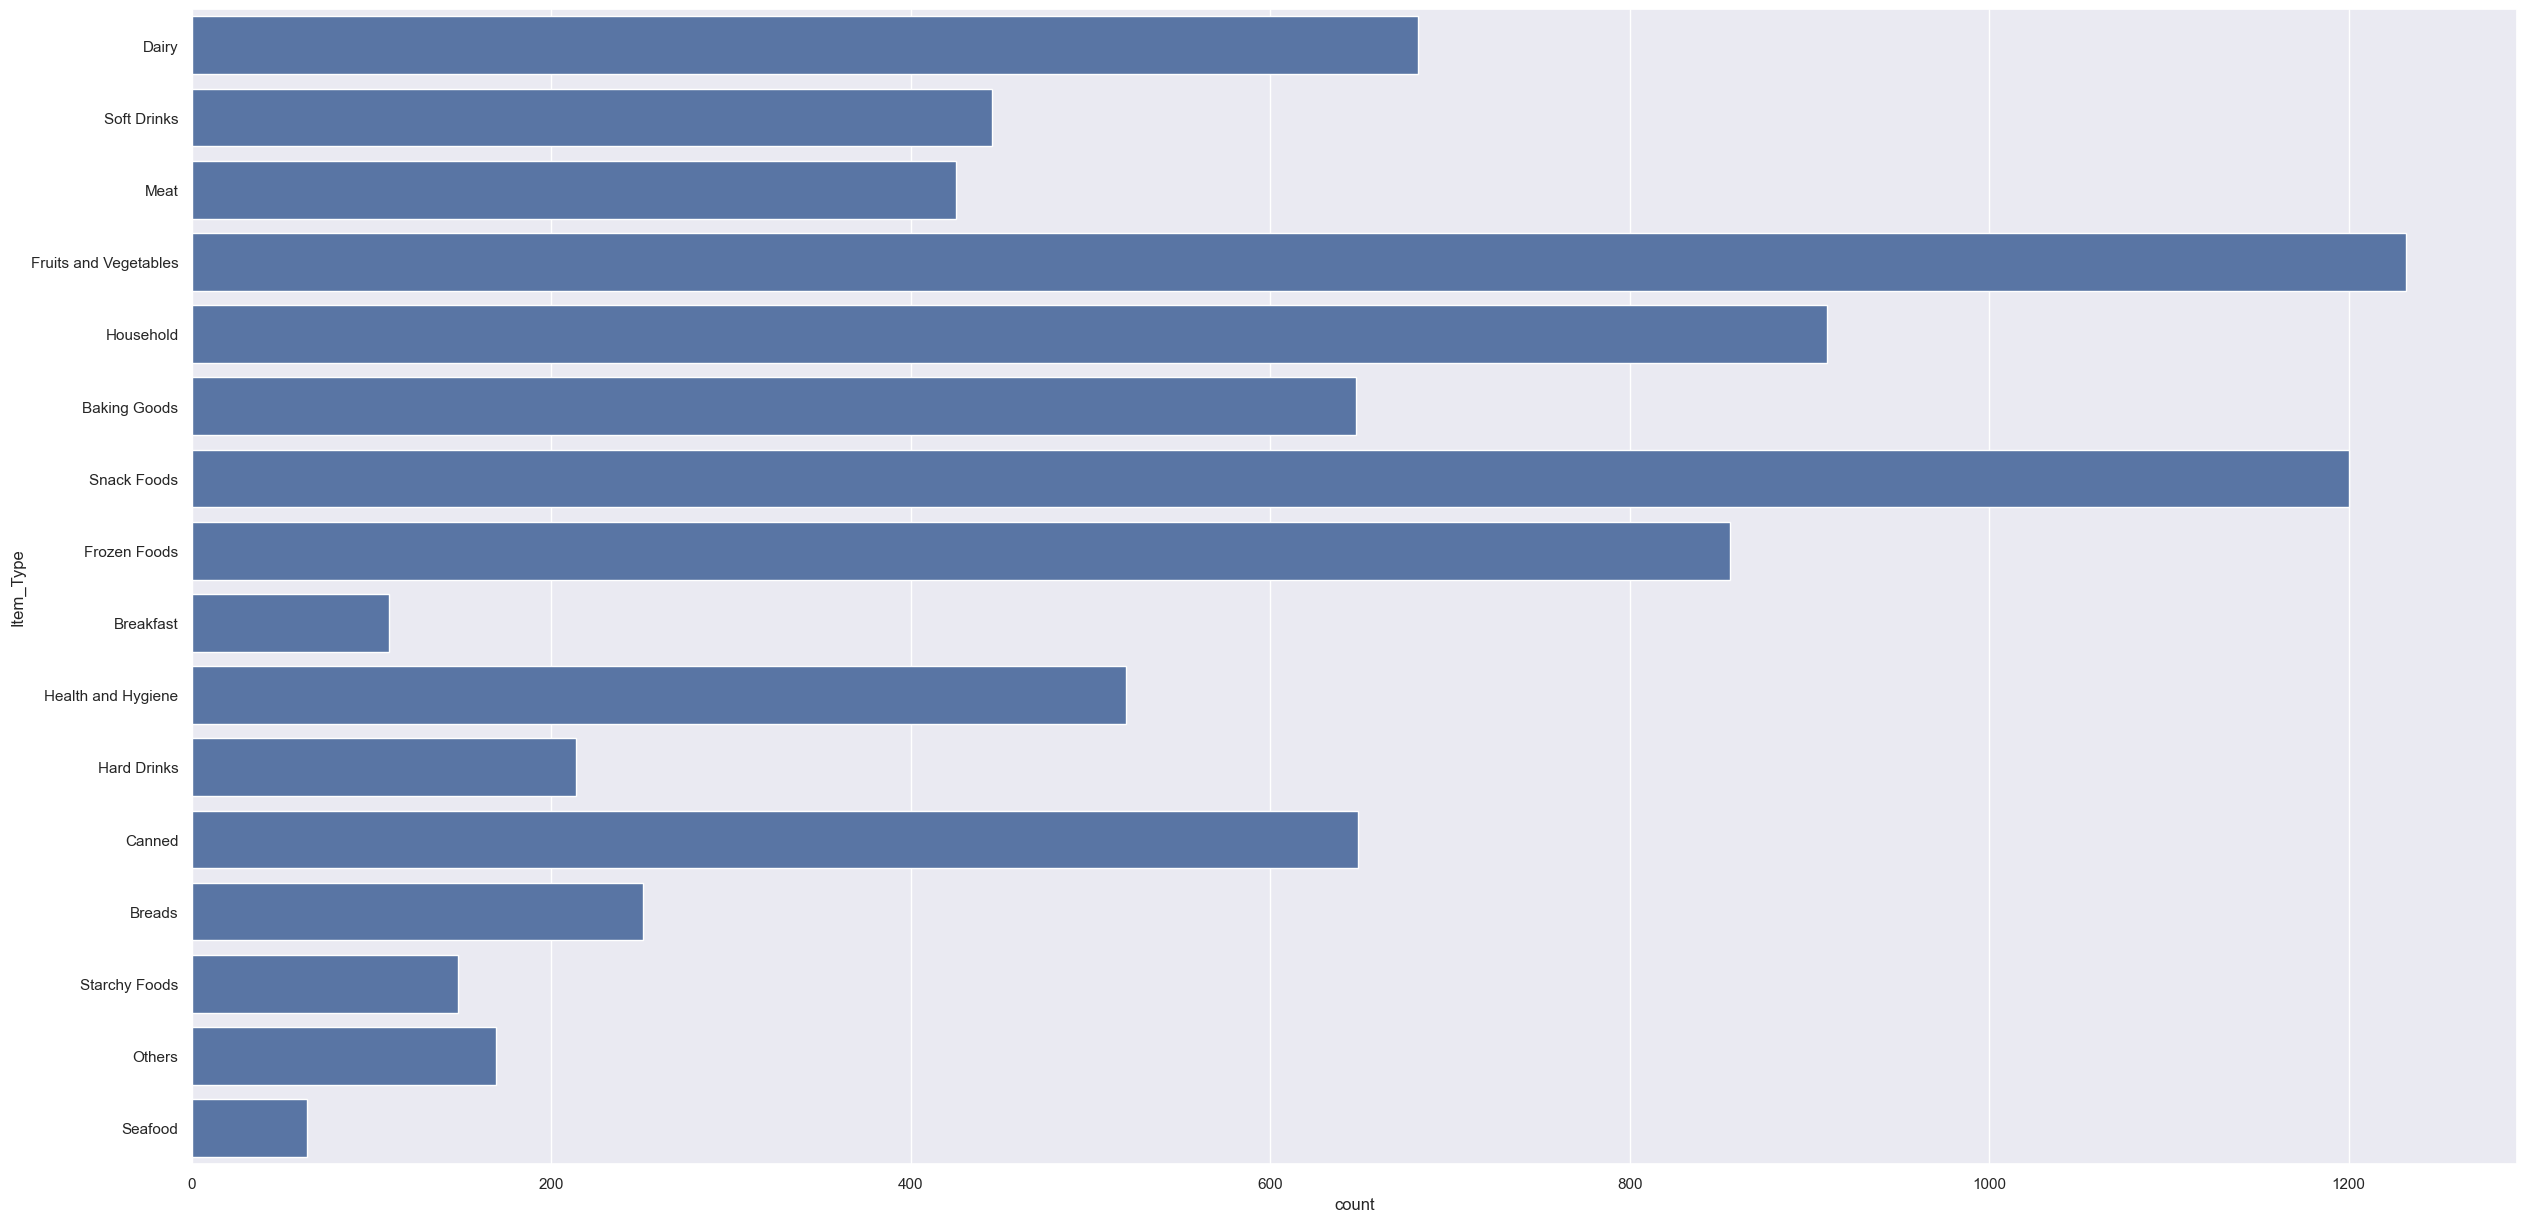

In [84]:
plt.figure(figsize=(30,15))
sns.countplot(df['Item_Type'])
plt.show()

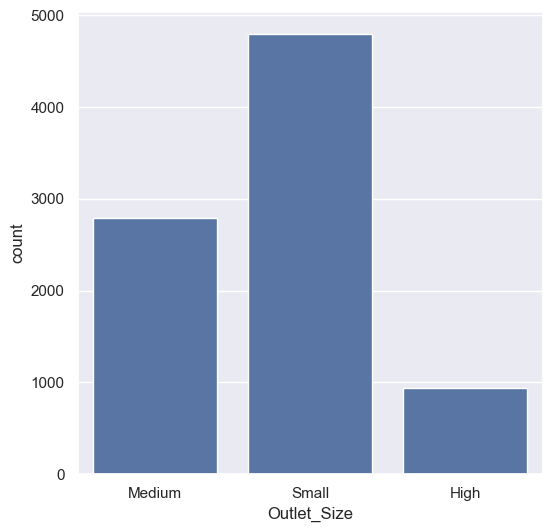

In [85]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

In [86]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [87]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [88]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [89]:
df_cat

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Label encoder

In [90]:
encoder = LabelEncoder()

In [91]:

df['Item_Fat_Content']=encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier']=encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [92]:
d=df['Outlet_Identifier'].value_counts()
d

Outlet_Identifier
5    935
1    932
9    930
8    930
6    930
7    929
3    928
2    926
0    555
4    528
Name: count, dtype: int64

In [93]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [94]:
y=df['Item_Outlet_Sales']
x=df.drop(columns='Item_Outlet_Sales',axis=1)

In [95]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [96]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# Train test split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [98]:
x_train.shape

(5966, 10)

In [99]:
y_train.shape

(5966,)

In [100]:
print(x_test.shape)
print(y_test.shape)

(2557, 10)
(2557,)


Standardization

In [101]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [102]:
x_train_std= sc.fit_transform(x_train)  # learning how the data is in X train and then transforming
x_test_std= sc.transform(x_test)

In [103]:
x_train_std

array([[-1.23468903,  1.35383105,  1.6066808 , ...,  0.80045197,
         1.08362706, -1.51340146],
       [ 1.6197663 , -0.73864461, -1.00844167, ...,  0.80045197,
        -1.38342848, -0.26268071],
       [-0.01563843,  1.35383105, -0.22706823, ..., -0.66532349,
         1.08362706,  2.2387608 ],
       ...,
       [ 1.10961842, -0.73864461, -0.91757329, ...,  0.80045197,
        -0.14990071, -0.26268071],
       [ 1.76213315, -0.73864461, -0.22428724, ...,  0.80045197,
        -0.14990071, -0.26268071],
       [ 0.81302082, -0.73864461, -0.95575131, ...,  0.80045197,
        -1.38342848, -0.26268071]])

In [104]:
x_test_std

array([[ 0.32660075, -0.73864461, -0.77358563, ..., -2.13109895,
         1.08362706, -0.26268071],
       [-1.18486063, -0.73864461,  0.10402804, ...,  0.80045197,
        -1.38342848, -0.26268071],
       [ 0.37405637,  1.35383105, -0.47971578, ..., -0.66532349,
        -1.38342848, -0.26268071],
       ...,
       [ 1.28757698, -0.73864461,  1.62692593, ...,  0.80045197,
         1.08362706, -1.51340146],
       [-0.693695  ,  1.35383105, -0.5450001 , ...,  0.80045197,
        -0.14990071, -0.26268071],
       [ 1.76213315,  1.35383105, -0.99823439, ...,  0.80045197,
        -0.14990071, -0.26268071]])

In [105]:
y_train

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [106]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
443     2133.2232
777     4287.7520
1119     767.0016
3209     642.4970
3742    2570.6538
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [107]:
import joblib 

In [108]:
joblib.dump(sc,'scaling.pkl')

['scaling.pkl']

# Machine learning model training
# XGRegressor

In [109]:
regressor=XGBRegressor()

In [110]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evalution

In [111]:
training_data_prediction=regressor.predict(x_train)

In [112]:
#R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)

In [113]:
print('R squared value =',r2_train)

R squared value = 0.878720670836139


In [114]:
test_data_predction=regressor.predict(x_test)

In [115]:
r2_test=metrics.r2_score(y_test,test_data_predction)

In [116]:
print('R sqaured value of test data=',r2_test)

R sqaured value of test data= 0.527365783994415


SAVING THE MODEL

In [117]:
#pickle the regressor model
joblib.dump(regressor,'regressor.pkl')

['regressor.pkl']